# **Demographic Data Anlyser 👥**
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1- Overview 🔎
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Introduction:** <br>
Demographic trends provide valuable insights into societal structures. This project aims to analyze demographic data extracted from the 1994 Census database using Pandas.

[freecodecamp | data-analysis-with-python-projects | demographic-data-analyzer](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer)

**Problem Statement:** <br>
- Understand the representation of different races in the dataset.
- Determine the average age of men.
- Analyze the percentage of individuals with a Bachelor's degree.
- Investigate the income distribution based on education levels.
- Identify the minimum weekly working hours and its relation to income.
- Explore countries with the highest percentage of individuals earning >50K.
- Determine the most popular occupation for those earning >50K in India.

**Data Source:** <br>
The dataset is sourced from the UCI Machine Learning Repository (Dua, D. and Graff, C., 2019). It comprises demographic attributes such as age, education, occupation, and salary.

Here is a sample of what the data:

|    |   age | workclass        |   fnlwgt | education   |   education-num | marital-status     | occupation        | relationship   | race   | sex    |   capital-gain |   capital-loss |   hours-per-week | native-country   | salary   |
|---:|------:|:-----------------|---------:|:------------|----------------:|:-------------------|:------------------|:---------------|:-------|:-------|---------------:|---------------:|-----------------:|:-----------------|:---------|
|  0 |    39 | State-gov        |    77516 | Bachelors   |              13 | Never-married      | Adm-clerical      | Not-in-family  | White  | Male   |           2174 |              0 |               40 | United-States    | <=50K    |
|  1 |    50 | Self-emp-not-inc |    83311 | Bachelors   |              13 | Married-civ-spouse | Exec-managerial   | Husband        | White  | Male   |              0 |              0 |               13 | United-States    | <=50K    |
|  2 |    38 | Private          |   215646 | HS-grad     |               9 | Divorced           | Handlers-cleaners | Not-in-family  | White  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  3 |    53 | Private          |   234721 | 11th        |               7 | Married-civ-spouse | Handlers-cleaners | Husband        | Black  | Male   |              0 |              0 |               40 | United-States    | <=50K    |
|  4 |    28 | Private          |   338409 | Bachelors   |              13 | Married-civ-spouse | Prof-specialty    | Wife           | Black  | Female |              0 |              0 |               40 | Cuba             | <=50K    |

**Data Exploration:** <br>
The dataset includes various features like age, workclass, education, marital status, and more. Each row represents an individual, providing a rich source for demographic analysis.

## 2- Preparation 📖
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
- data collection
- data cleaning
- data transformation

In [204]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
# Read data from csv file

df = pd.read_csv('demo_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [206]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [207]:
# no null values but we have some '?' values in columns(workclass, occupation and native-country) 
df.replace('?', np.nan, inplace = True) # replace '?' with NaN
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [208]:
df.isnull().sum() #  of null values present in each columns.

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

workclass = 1836 missing

occupation = 1843 missing

native.country = 583 missing

Is seems where value occupation is missing, workclass is missing as well because their missings value is pretty close,

Decided to drop NaN and duplucate rows

In [209]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [210]:
df.isnull().sum() # count of numbers of of null values present in each columns.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## 3- Data Analysis 🕵️
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### How many of each salary are represented in this dataset? 

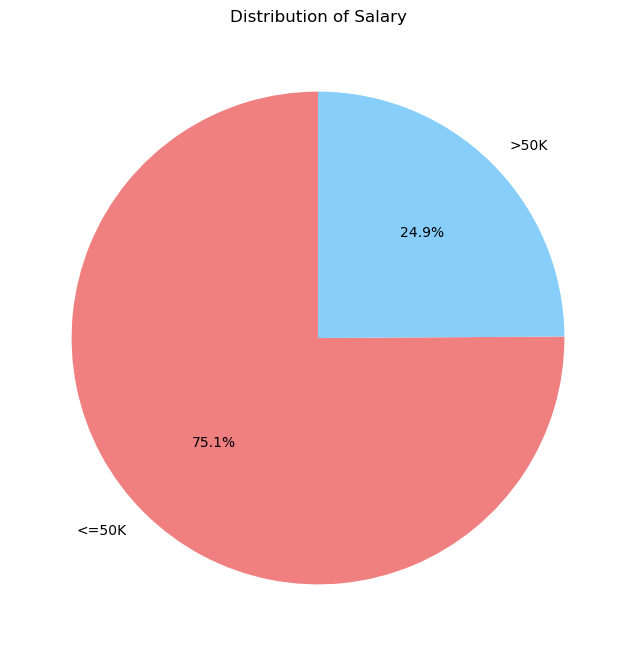

In [211]:
salary_count = df['salary'].value_counts()

# Plotting the pie chart
labels = salary_count.index
sizes = salary_count.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Salary')
plt.show()

#### How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.

race
White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64


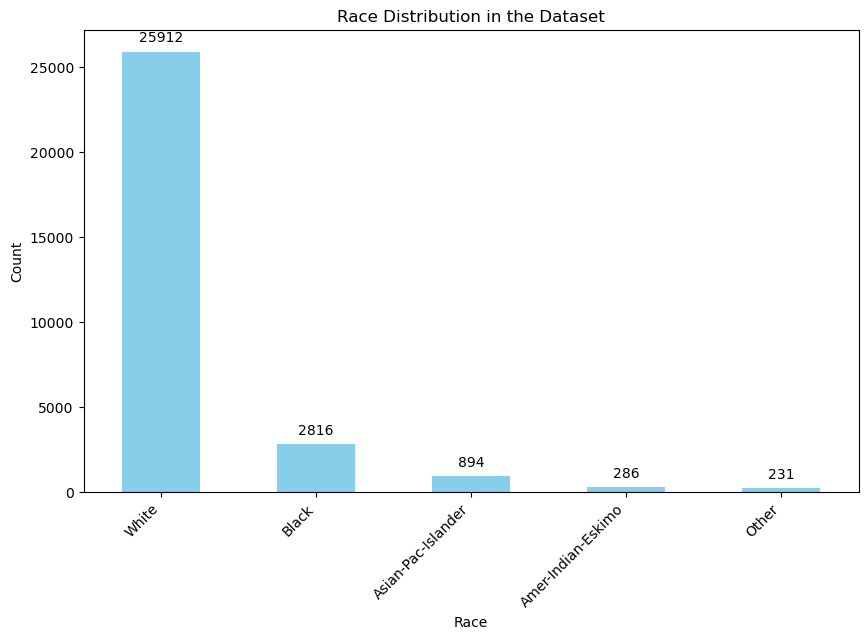

In [212]:
race_count = df['race'].value_counts()
print(race_count)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = race_count.plot(kind='bar', color='skyblue')
plt.title('Race Distribution in the Dataset')
plt.xlabel('Race')
plt.ylabel('Count')

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### What is the average age of men?

In [213]:
# What is the average age of men?

average_age_men = round((df[df['sex'] == 'Male']['age'].mean()))
print('Average age of men:', average_age_men)

Average age of men: 39


#### The percentage of people who have a Bachelor's degree

In [214]:
total_count = len(df['education'])
bachelors_count = len(df[df['education'] == 'Bachelors'])
percentage_bachelors = round(((bachelors_count / total_count) * 100),2)

print('Percentage of people with Bachelor\'s degree:', percentage_bachelors ,"%")

Percentage of people with Bachelor's degree: 16.73 %


#### Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [215]:
# Filter the data to include only individuals with advanced education
advanced_edu = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Calculate the percentage of individuals with advanced education who make more than 50K

percentage_advanced_edu_above_50k = round((len(advanced_edu[advanced_edu['salary'] == '>50K']) / len(advanced_edu) * 100),2)
print("Percentage of people with advanced education making more than 50K:", percentage_advanced_edu_above_50k,"%")

Percentage of people with advanced education making more than 50K: 47.2 %


#### Percentage of people without advanced education ~(`Bachelors`, `Masters`, or `Doctorate`) and making more than 50K?

In [216]:
# Filter the data to exclude individuals with advanced education
no_advanced_edu = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Calculate the percentage of individuals without advanced education who make more than 50K
percentage_no_advanced_edu_above_50k = round(((len(no_advanced_edu[no_advanced_edu['salary'] == '>50K']) / len(no_advanced_edu)) * 100),2)
print("Percentage of people without advanced education who make more than 50K:", percentage_no_advanced_edu_above_50k,"%")

Percentage of people without advanced education who make more than 50K: 18.11 %


#### Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

In [217]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

# Calculate the percentage of individuals with advanced education who make less than 50K

percentage_advanced_edu_below_50k = round(((len(advanced_edu[advanced_edu['salary'] == '<=50K']) / len(advanced_edu)) * 100),2)
print("Percentage of people with advanced education making less than 50K:", percentage_advanced_edu_below_50k,"%")

Percentage of people with advanced education making less than 50K: 52.8 %


#### Percentage of people with no advanced education ~(`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

In [218]:
# What percentage of people with no advanced education (`Bachelors`, `Masters`, or `Doctorate`) make less than 50K?

# Calculate the percentage of individuals with no advanced education who make less than 50K

percentage_no_advanced_edu_below_50k = round(((len(no_advanced_edu[no_advanced_edu['salary'] == '<=50K']) / len(no_advanced_edu)) * 100),2)
print("Percentage of people without advanced education making less than 50K:", percentage_no_advanced_edu_below_50k,'%')

Percentage of people without advanced education making less than 50K: 81.89 %


#### The minimum number of hours a person works per week (hours-per-week feature)

In [219]:
# The describe() method will give more details on the hours-per-week column. 

hour_stats = df['hours-per-week'].describe()
print(hour_stats)

count    30139.000000
mean        40.934703
std         11.978753
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


As we can see, the minimum value of 1 is indeed valid and not an error in the dataset. This suggests that there are some individuals who reported working only 1 hour per week. 

However, this is relatively uncommon, as the majority of individuals work between 40 and 45 hours per week (as shown by the **median** value of 40 and the interquartile range of 40-45).

#### What percentage of the people who work the minimum number of hours per week have a salary of >50K

In [220]:
num_min_workers = len(df[df['hours-per-week'] == min_work_hours])
num_rich_min_workers = len(df[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')])

rich_percentage = (num_rich_min_workers / num_min_workers) * 100

print(f"Percentage of people who work the minimum number of hours per week and have a salary of >50K: {rich_percentage:.2f}%")

Percentage of people who work the minimum number of hours per week and have a salary of >50K: 14.29%


#### Country that has the highest percentage of people that earn >50K

In [221]:
# Select rows where salary is greater than 50K
high_earners = df[df['salary'] == '>50K']

# Group by country and count number of people in each group
grouped = high_earners.groupby('native-country')['native-country'].count()

# Count total number of people in each country
total = df.groupby('native-country')['native-country'].count()

# Calculate percentage of people who earn more than 50K in each country
percentages = (grouped / total) * 100

# Find country with highest percentage using panda method idxmax()
highest_earning_country = percentages.idxmax()
highest_percentage = round(percentages[highest_earning_country], 2)

print("The country with the highest percentage of people earning more than 50K is:", highest_earning_country, "with a percentage of", highest_percentage, "%")

The country with the highest percentage of people earning more than 50K is: Taiwan with a percentage of 45.24 %


#### Print percentage of people who earn more than 50K in each country

native-country
Dominican-Republic     2.99
Columbia               3.57
Guatemala              4.92
Mexico                 5.45
Nicaragua              6.06
Peru                   6.67
Vietnam                7.81
Honduras               8.33
El-Salvador            9.00
Haiti                  9.52
Puerto-Rico           11.01
Trinadad&Tobago       11.11
Laos                  11.76
Portugal              11.76
Jamaica               12.50
Ecuador               14.81
Thailand              17.65
Scotland              18.18
Poland                19.64
South                 19.72
Ireland               20.83
Hungary               23.08
United-States         25.44
Cuba                  27.17
Greece                27.59
China                 29.41
Hong                  31.58
Philippines           31.91
Canada                33.64
Germany               34.38
England               34.88
Italy                 35.29
Yugoslavia            37.50
Cambodia              38.89
Japan                 38.98
India

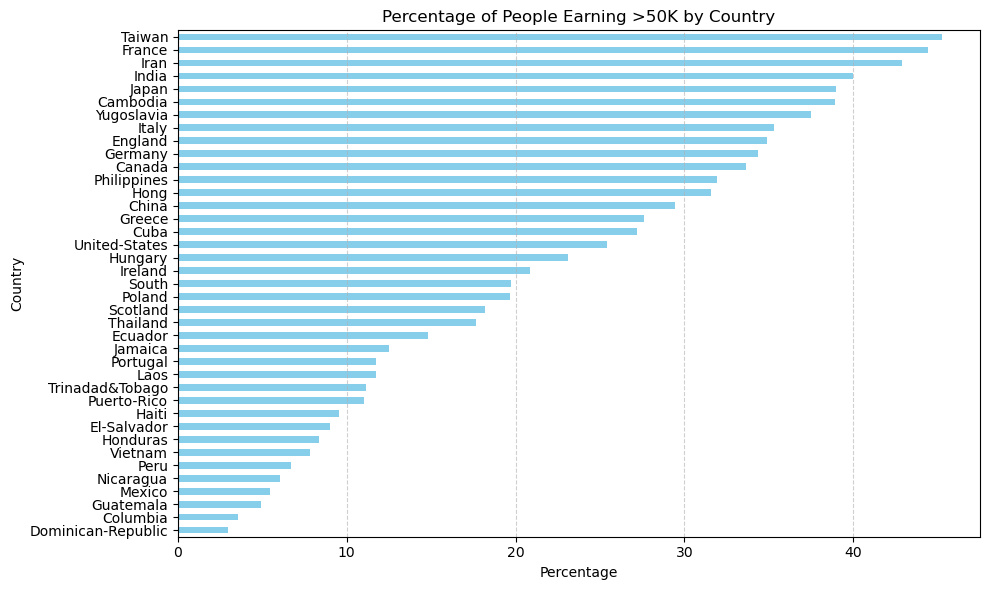

In [222]:
# Assuming 'percentages' is a pandas Series
percentages_sorted = round((percentages.dropna().sort_values(ascending=True)), 2)

# Find the country with the highest percentage
highest_earning_country = percentages_sorted.index[0]
highest_percentage = round(percentages_sorted.iloc[0], 2)

print(percentages_sorted)

# Plotting the data without NaN values
plt.figure(figsize=(10, 6))
percentages_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Percentage of People Earning >50K by Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Identify the most popular occupation for those who earn >50K in India.

In [223]:
# Select rows where salary is greater than 50K and native country is India
high_earning_indians = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]

# Group by occupation and count number of people in each group
grouped = high_earning_indians['occupation'].value_counts()

# Find the occupation with the highest count
most_popular_occupation = grouped.idxmax()

print("The most popular occupation for those who earn >50K in India is:", most_popular_occupation)

The most popular occupation for those who earn >50K in India is: Prof-specialty


## 4- Conclusion ✍️
![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

**Summary of Findings:**

Representation of Different Races:

- White: 25,912
- Black: 2,816
- Asian-Pac-Islander: 894
- Amer-Indian-Eskimo: 286
- Other: 231

Salary Distributions:

- <=50K: 22,633 and >50K: 7,506

- Average Age of Men: 39
- 16.73% of individuals in the dataset have a Bachelor's degree.

Income Distribution Based on Education Levels:

- Percentage of people with advanced education (> Bachelor's) making >50K: 47.2%
- Percentage of people without advanced education making >50K: 1.11%
- Percentage of people with advanced education making <=50K: 52.8%
- Percentage of people without advanced education making <=50K: 81.89%

Minimum Weekly Working Hours and Its Relation to Income:

- The minimum value of 1 hour per week is valid.
- Majority work between 40 and 45 hours per week.
- Percentage of people working the minimum hours per week (<50K): 85.71%

Countries with the Highest Percentage of Individuals Earning >50K:

- Taiwan has the highest percentage of people earning >50K (45.24%).
- Prof-specialty is the most popular occupation for those earning >50K in India.

**Limitations of the dataset:**

- Missing Values:

The presence of missing values, represented as '?' in some columns, may affect the accuracy of analyses. Understanding the nature of these missing values and implementing appropriate strategies for handling them is crucial. 
Decided to replace ? with NaN and remove any rows with NaN

- Representativeness:

The dataset might not be fully representative of the entire population, as it could be subject to selection biases. Understanding the demographics of the dataset compared to the broader population is essential for drawing valid conclusions.

- Categorical Encoding:

Categorical variables, especially those related to race and education, are encoded in a specific way. The choice of encoding may influence the results of analyses, and it's important to be aware of how these variables are represented.

- Occupation Categories:

The occupation categories might be broad and not provide a detailed understanding of specific job roles or industries. A more granular breakdown of occupations could enhance the depth of analysis.

- Temporal Aspect:

The dataset might not capture changes over time. Economic, social, or cultural shifts could impact income and employment patterns, and a temporal analysis would provide a more comprehensive picture.



